<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Part-2/blob/main/notebooks/3_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering
K-Means clustering is the most popular unsupervised machine learning algorithm. It is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. 
In this exercise we are using a really small dataset of countries with their location (lat, long) and their language.

In [ ]:
# Import
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = f'https://raw.githubusercontent.com/timurista/data-analysis/master/python-jupyter/Cluster%20Analysis/3.01.%20Country%20clusters.csv'
df = pd.read_csv(url)
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


Let's plot this data using their Longitude and Latitude

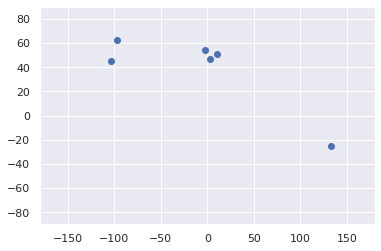

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Here we want to simply use the Longitude and Latitude as features and try to cluster these countries.

In [ ]:
# Selecting the Features
X = df[['Longitude', 'Latitude']]

Now let's use the KMeans clustering to fit a model. Since here our data is quite simple we can see that we can cluster these countries into 3 groups. Although in real cases it's not obvious or easy to guess.
Let's create the first model with 3 clusters:

In [ ]:
# KMeans Important Parameters:
#   n_clusters - number of clusters
#   n_init - numbe of time the k-means algorithm will be run with different centroid seeds
#   max_iter - maximum number of iterations of the k-means algorithm for a single run
# More details: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Create K-means model
kmeans = KMeans(n_clusters=3, n_init=5, max_iter=100)
# Fit the model on data/features
kmeans.fit(X)
# Predict the clusters for the given data
identified_clusters = kmeans.predict(X)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

Let's visualize the output:

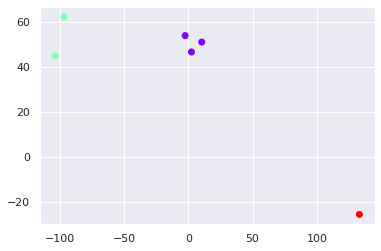

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'], c=identified_clusters, cmap='rainbow')

As we can see it could properly detect our 3 clusters.
Now let' imagine that we are not sure how many clusters we should use to segment our data. To find out what is the best number of `K` we can use the **Elbow Method**.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as `inertia`, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

> Inertia
- Inertia is not a normalized metric.
- The lower values of inertia are better and zero is optimal.
- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).
  - Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

In [ ]:
# List of inertias for different k values
inertias = []
# Setting the ranges of K which we want to test
k_ranges = range(1,7)
for k in k_ranges:
  # Create a KMeans instance with k clusters: model
  model = KMeans(n_clusters=k)
  # Fit model to samples
  model.fit(X)
  # Append the inertia to the list of inertias
  inertias.append(model.inertia_)

Now let's plot the inertias:

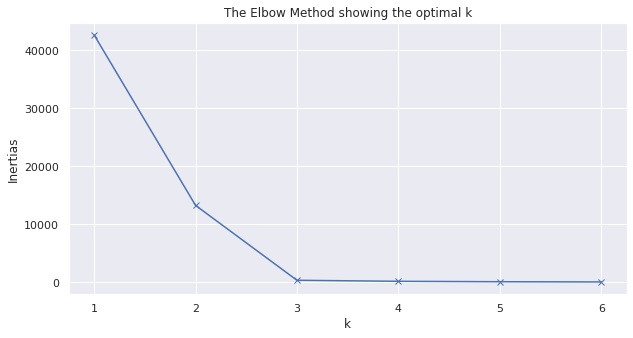

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_ranges, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the plot it is now clear that 3 is the good number of clusters.

# Exercise
Now let's try to use the following URL and read the data. Please follow the following steps:
*   Try to plot the data points/ countries
  - Can you visualy say how many clusters we have?
*   Use K-Means clustering to cluster the countries with whatever your guess was on number of clusters
*   What would be the best number of clusters for this data?
  - Use Elbow Method (plot)

In [ ]:
url = f'https://raw.githubusercontent.com/timurista/data-analysis/master/python-jupyter/Cluster%20Analysis/3.01.%20Country%20clusters.csv'
# Read the data into Pandas DataFrame
# Plot the data points
# Train a K-Means model on the data with specific K
# Use Elbow Method to indicate the best number of K

# KMeans on Geyser's Eruptions Segmentation
The dataset has 272 observations and 2 features. The data covers the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA. We’ll first implement the kmeans algorithm on this dataset to find K subgroups within the data points and group them accordingly. Below is the description of the features:

* eruptions (float): Eruption time in minutes.
* waiting (int): Waiting time to next eruption.

Let’s load the data and plot them:

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


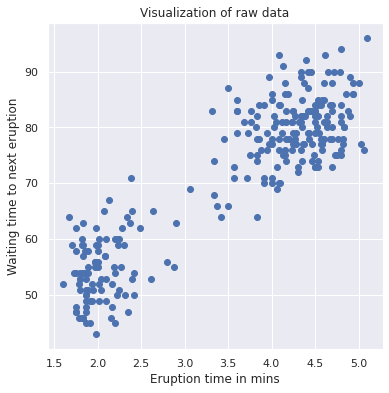

In [ ]:
url = "https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv"

# Import the data
df = pd.read_csv(url, delimiter='\t')

# Look at few rows of data
display(df.head())

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');


Simply by looking at the data we can see that we have 2 clusters. Again it's not always the case specially when we have multiple features/dimentions which is usually the case with real data.
> Important: Scale/standardize the data when applying kmeans algorithm.

Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.

`sklearn` has multiple functions in their preprocessing package for standardization. Here we are going to use one of the simple ones called `StandardScaler` which standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:

`z = (x - u) / s`



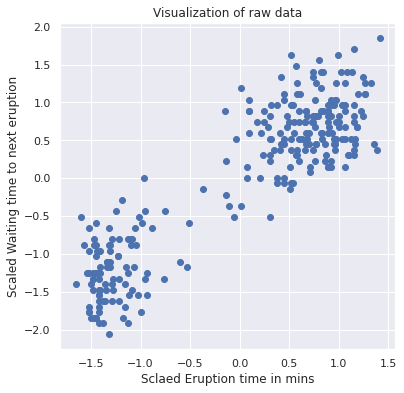

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
X_std = StandardScaler().fit_transform(df)
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel('Sclaed Eruption time in mins')
plt.ylabel('Scaled Waiting time to next eruption')
plt.title('Visualization of raw data');

As we can see, standardization preserved the position of data points.

Let's run Kmeans with 2 clusters:

In [ ]:
from sklearn.cluster import KMeans
# Run KMeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_
print(centroids)

[[-1.26008539 -1.20156744]
 [ 0.70970327  0.67674488]]


Let's plot the clustered data with their centroids:


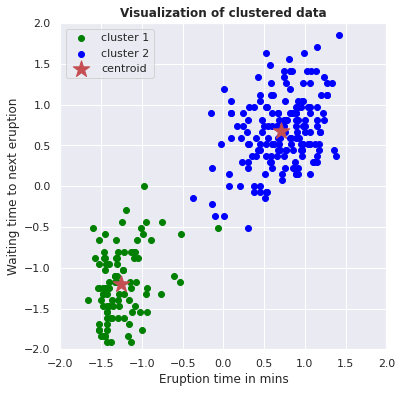

In [ ]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

The above graph shows the scatter plot of the data colored by the cluster they belong to. In this example, we chose K=2. The symbol ‘*‘ is the centroid of each cluster. We can think of those 2 clusters as geyser had different kinds of behaviors under different scenarios.

> Important: different initializations of centroids will yield to different results

Next, we’ll show that different initializations of centroids may yield to different results. We’ll use 9 different random_state to change the initialization of the centroids and plot the results. The title of each plot will be the sum of squared distance of each initialization.


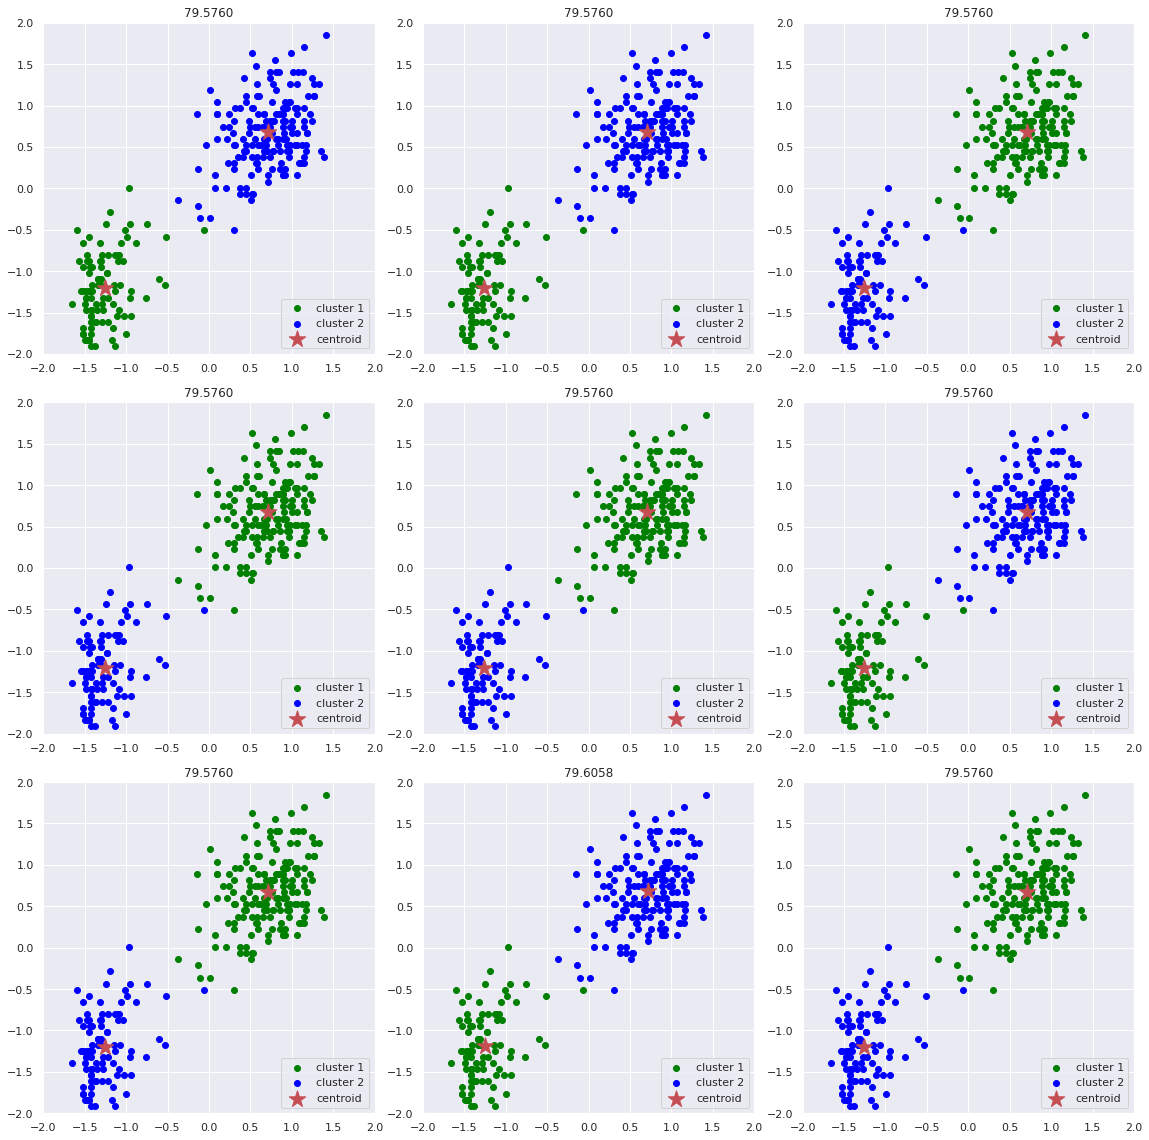

In [ ]:
import random
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=2,
                random_state=random.randrange(0,1000))
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

As the graph above shows that we only ended up with two different ways of clusterings based on different initializations. We would pick the one with the lowest sum of squared distance.

# Kmeans on Iris Data

This time let's take a look at a data with multiple features/attributes. We are using IRIS dataset which is one of the best know database in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
> For more information: [link](https://archive.ics.uci.edu/ml/datasets/iris)

When it comes to data with multiple attributes it's not easy to visualizae them. Sometimes we can visualize all combination of pair-features.



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Features Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


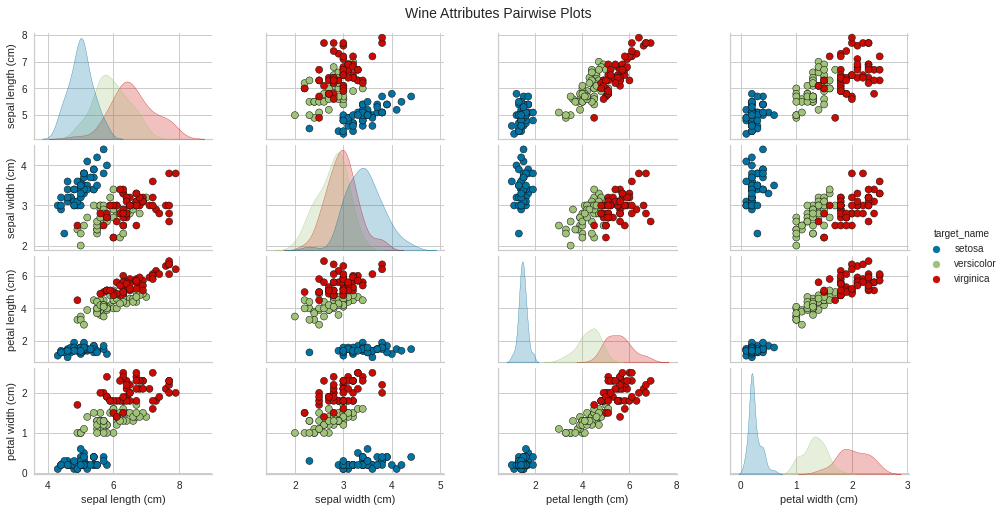

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
print(iris.keys())
print("Features Names:", iris.feature_names)
print("Target Names:", iris.target_names)

X = iris.data
y = iris.target

# Create pandas dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df.apply(lambda row: iris.target_names[int(row['target'])], axis=1)
display(df.head())

# Pair-wise Scatter Plots
pp = sns.pairplot(df.drop(columns='target'), hue='target_name', height=1.8,
                  aspect=1.8, plot_kws=dict(edgecolor="k",
                  linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)


Now let's use KElbowVisualizer this time. Here is the Python code using YellowBricks library for Elbow method / SSE Plot created using SKLearn IRIS dataset. In the Elbow method where an SSE line plot is drawn, if the line chart looks like an arm, then the “elbow” on the arm is the value of k that is the best.

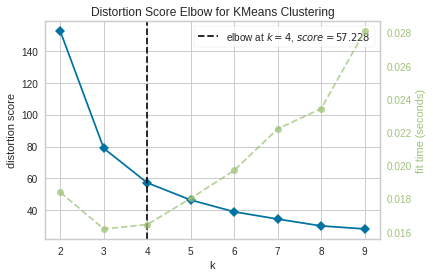

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The silhouette score of a point measures how close that point lies to its nearest neighbor points, across all clusters. It provides information about clustering quality which can be used to determine whether further refinement by clustering should be performed on the current clustering. Here is the Python code using YellowBricks library for Silhouette analysis/plots:

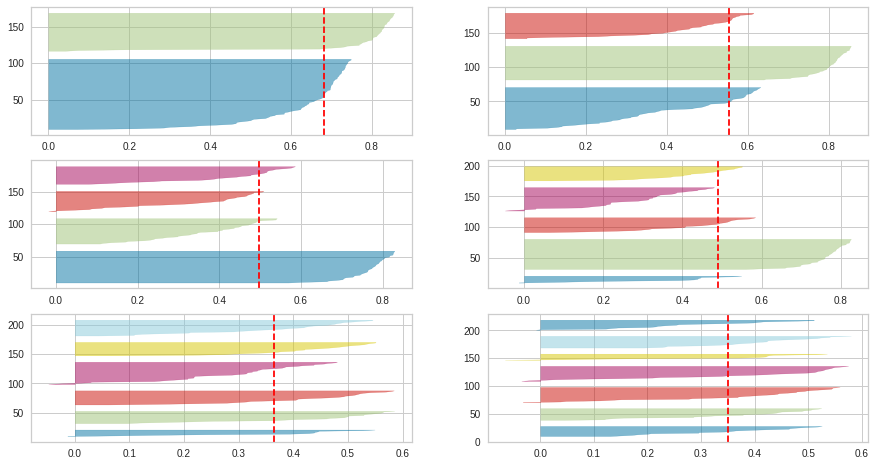

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
# Plot Silhouette
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

While the elbow method and silhouette score provide information on different aspects, both provide valuable information for clustering analysis. Both the Elbow method / SSE Plot and the Silhouette method can be used interchangeably based on the details presented by the plots. It may be a good idea to use both plots just to make sure that you select the most optimal number of clusters. While both provide valuable information for clustering analysis elbow method is easy to implement and provides valuable results.

The major difference between elbow and silhouette scores is that elbow only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc. The calculation simplicity of elbow makes it more suited than silhouette score for datasets with smaller size or time complexity. In the Elbow method where an SSE line plot is drawn, if the line chart looks like an arm, then the “elbow” on the arm is the value of k that is the best. It is the point, from where the decrease in SSE starts looking linear.



Useful Links:
- https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
- https://predictivehacks.com/k-means-elbow-method-code-for-python/
- https://github.com/timurista/data-analysis/blob/master/python-jupyter/Cluster%20Analysis/A%20Simple%20Example%20of%20Clustering%20-%20Exercise.ipynb
- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a [Exercise]
- https://vitalflux.com/elbow-method-silhouette-score-which-better/